## Mestopy Demo-Notebook


In [1]:
# import modules
import pyfar
import numpy as np

# import from mestopy
from mestopy.mestopy import MeasurementChain

#### Demo: basic functionality of Measurement Chain

In [2]:
# initialise measurement chain @fs=48000
fs = 48000
chain = MeasurementChain(fs)

In [3]:
# reset MeasurementChain refs, in case you run this cell multiple times
chain.reset_devices()

# generate a flat signal
sig = pyfar.Signal(np.full(int(fs/2), 1.0), fs, domain='freq')

# add these signals as devices to the measurement chain; attention: Device 1 is added twice by "mistake"
chain.add_device('Device 1', sig, sens=1.0) 
chain.add_device('Device 1', sig, sens=1.0)
chain.add_device('Device 2', sig, sens=2.0)
chain.add_device('Device 3', sig, sens=0.5)

# print measurement chain __repr__
print(chain)

# print names of devices in measurement chain
print(chain.list_devices())

# remove double added Device 1 from measurement chain
chain.remove_device(1)

# print names of devices in measurement chain after removing
print(chain.list_devices())

# get the freq-response of whole measurement chain as pyfar.Signal
print(chain.freq)

# get the freq-response of specific device in measurement chain as pyfar.Signal
print(chain.device_freq(1))

/home/alex/Git/pyfar-develop/pyfar/signal.py:507: UserWarning: Number of time samples not given, assuming an even number of samples from the number of frequency bins.
  warnings.warn(
measurement chain with 4 devices @ 48000 Hz sampling rate.
#  0: Device 1 defined by 24000 freq-bins, sensitivity=1.0 unit=None
#  1: Device 1 defined by 24000 freq-bins, sensitivity=1.0 unit=None
#  2: Device 2 defined by 24000 freq-bins, sensitivity=2.0 unit=None
#  3: Device 3 defined by 24000 freq-bins, sensitivity=0.5 unit=None

['Device 1', 'Device 1', 'Device 2', 'Device 3']
['Device 1', 'Device 2', 'Device 3']
freq domain energy Signal:
(1,) channels with 143992 samples @ 48000 Hz sampling rate and none FFT normalization

freq domain energy Signal:
(1,) channels with 47998 samples @ 48000 Hz sampling rate and none FFT normalization



<AxesSubplot:xlabel='Frequency in Hz', ylabel='Magnitude in dB'>

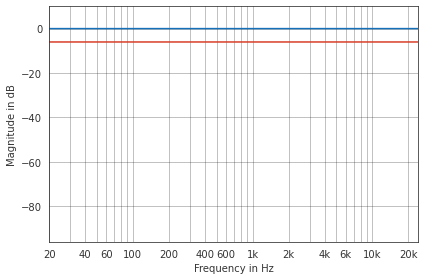

In [4]:
# plot freq-response of whole measurement chain
fig1 = pyfar.plot.line.freq(chain.freq)

# plot freq-response of element 1 of the measurement chain
pyfar.plot.line.freq(chain.device_freq(2))

['Device 1', 'Device 2', 'Device 3']
['Device 1', 'Device 2']


<AxesSubplot:xlabel='Frequency in Hz', ylabel='Magnitude in dB'>

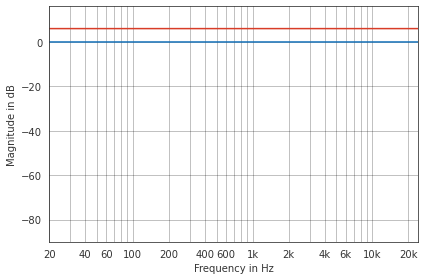

In [5]:
# remove devices from measurement chain by name
print(chain.list_devices())
chain.remove_device('Device 3')
print(chain.list_devices())

# plot freq-response of whole measurement chain
fig3 = pyfar.plot.line.freq(chain.device_freq('Device 1'))
# invert ref-response and plot again
pyfar.plot.line.freq(chain.freq)

In [6]:
chain.add_device('new device')
print(chain)

measurement chain with 3 devices @ 48000 Hz sampling rate.
#  0: Device 1 defined by 24000 freq-bins, sensitivity=1.0 unit=None
#  1: Device 2 defined by 24000 freq-bins, sensitivity=2.0 unit=None
#  2: new device defined by sensitivity=1 unit=None



In [7]:
# print freq of chain, it is a Signal, because there are devices with frequency responses
print(chain.freq)

# create measurement chain with no devices
chain2 = MeasurementChain(48000)
# print freq, it is a scalar of 1, because there are no devices
print(chain2.freq)

freq domain energy Signal:
(1,) channels with 95995 samples @ 48000 Hz sampling rate and none FFT normalization

1.0
